# 1.1 AFFINE IMAGE TRANSFORMATION

In [27]:
%pylab notebook
import numpy as np
import cv2
import copy
import math

from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
def NNInterpolation(image, transformation_matrix):
    """
    function to interpolate the intensity using nearest neighbor
    image: the input image
    transformation_matrix: the geometric transformation matrix to be applied
    return
    transImg: the image after the geometric transformation
    """
    img = copy.deepcopy(image)  
    shape = img.shape
    transImg = np.zeros(shape)
    trans_matrix_inverse = np.linalg.inv(transformation_matrix)
    for x in range(0, shape[0]-1):
            for y in range(0, shape[1]-1):
                point_mat = np.array([x-(shape[0]/2), y-(shape[1]/2), 1]).reshape(3,1)
                temp_mat =  np.matmul(trans_matrix_inverse , point_mat)
                a = int((np.round((temp_mat[0]))) + (shape[0]/2))
                b = int((np.round((temp_mat[1]))) + (shape[1]/2))
                if (a<0) or (b<0) or (a>= shape[0]) or (b>= shape[1]):
                    continue
                transImg[x][y] = img[a][b]
    return transImg
    

In [29]:
def BiLinearInterpolation(image, transformation_matrix):
    """
    function to interpolate the intensity using BiLinear
    image: the input image
    transformation_matrix: the geometric transformation matrix to be applied
    return
    transImg: the image after the geometric transformation
    """
    function to interpolate the intensity using nearest neighbor
    image: the input image
    transformation_matrix: the geometric transformation matrix to be applied
    return
    transImg: the image after the geometric transformation
    """
    """
    img = copy.deepcopy(image) 
    shape = img.shape
    transImg = np.zeros(shape)
    trans_matrix_inverse = np.linalg.inv(transformation_matrix)
    for x in range(0, shape[0]-1):
            for y in range(0, shape[1]-1):
                point_mat = np.array([x-(shape[0]/2), y-(shape[1]/2), 1]).reshape(3,1)
                temp_mat =  np.matmul(trans_matrix_inverse , point_mat)
                a = temp_mat[0] + (shape[0]/2)
                b = temp_mat[1] + (shape[1]/2)
                if (a<0) or (b<0) or (a>= shape[0]-1) or (b>= shape[1]-1):
                    continue

                fa = int(math.floor(a))
                fb = int(math.floor(b))
                ca = int(math.ceil(a))
                cb = int(math.ceil(b))

                na = a - fa
                nb = b - fb
                transImg[x][y] = img[fa][fb]*(1-na)*(1-nb) + \
                                 img[ca][fb]* na * (1-nb) + \
                                 img[fa][cb] * (1-na) * nb + \
                                 img[ca][cb] * na * nb
    return transImg

SyntaxError: invalid syntax (<ipython-input-29-8a10f0499792>, line 9)

In [30]:
def affineTransformScaling(image, sx, sy, interpolation="BiLinear"):
    """
    function to scale and display the scaled image
    image: the input image
    sx: scaling factor in x direction
    sy: scaling factor in y direction
    interpolation: the interpolation method to be used. Default is 'BiLinear'. Pass "NN" for nearest neighbor interpolation
    return: None
    """
    
    img = copy.deepcopy(image) 
    
    shape = img.shape
    transImg = np.zeros(shape)
    trans_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]], dtype='float')
    if interpolation == "BiLinear":
        transImg = BiLinearInterpolation(img, trans_matrix)
        
    elif interpolation == "NN" :
        transImg = NNInterpolation(img, trans_matrix)
                
    else:
        print ("Please enter NN for nearest neighbor interpolation. Default is BiLinear")

    figure()
    plt.title("Scaling")
    plt.imshow(transImg, cmap='gray')

In [31]:
def affineTransformRotation(image, theta, interpolation="BiLinear"):
    """
    function to rotate and display the rotated image
    image: the input image
    theta: angle by which the image is to be rotated
    interpolation: the interpolation method to be used. Default is 'BiLinear'. Pass "NN" for nearest neighbor interpolation
    return: None
    """

    img = copy.deepcopy(image)  
    theta = np.deg2rad(theta)
    shape = img.shape
    transImg = np.zeros(shape)
    
    trans_matrix = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]], dtype='float')
    if interpolation == "BiLinear":
        transImg = BiLinearInterpolation(img, trans_matrix)
        
    elif interpolation == "NN" :
        transImg = NNInterpolation(img, trans_matrix)
                
    else:
        print ("Please enter NN for nearest neighbor interpolation. Default is BiLinear")

    figure()
    plt.title("Rotation")
    plt.imshow(transImg, cmap='gray')

In [32]:
def affineTransformTranslation(image, tx, ty, interpolation="BiLinear"):
    """
    function to translate and display the translated image
    image: the input image
    tx: translation factor in x direction
    ty: translation factor in y direction
    interpolation: the interpolation method to be used. Default is 'BiLinear'. Pass "NN" for nearest neighbor interpolation
    return: None
    """
    img = copy.deepcopy(image)  
    shape = img.shape
    transImg = np.zeros(shape)
   
    trans_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]], dtype='float')
    if interpolation == "BiLinear":
        transImg = BiLinearInterpolation(img, trans_matrix)
        
    elif interpolation == "NN" :
        transImg = NNInterpolation(img, trans_matrix)
                
    else:
        print ("Please enter NN for nearest neighbor interpolation. Default is BiLinear")

    figure()
    plt.title("Translation")
    plt.imshow(transImg, cmap='gray')
    

In [33]:
def affineTransformShearingH(image, sh, interpolation="BiLinear"):
    """
    function to shear the image horizontally and display the sheared image
    image: the input image
    sh: shearing factor 
    interpolation: the interpolation method to be used. Default is 'BiLinear'. Pass "NN" for nearest neighbor interpolation
    return: None
    """

    img = copy.deepcopy(image)  
    shape = img.shape
    transImg = np.zeros(shape)
    
    print (img.shape, transImg.shape)
    trans_matrix = np.array([[1, 0, 0], [sh, 1, 0], [0, 0, 1]], dtype='float')
    if interpolation == "BiLinear":
        transImg = BiLinearInterpolation(img, trans_matrix)
        
    elif interpolation == "NN" :
        transImg = NNInterpolation(img, trans_matrix)
                
    else:
        print ("Please enter NN for nearest neighbor interpolation. Default is BiLinear")

            

    figure()
    plt.title("Shearing Horizontal Direction")
    plt.imshow(transImg, cmap='gray')

In [34]:
def affineTransformShearingV(image, sv, interpolation="BiLinear"):
    """
    function to shear the image vertically and display the sheared image
    image: the input image
    sv: shearing factor 
    interpolation: the interpolation method to be used. Default is 'BiLinear'. Pass "NN" for nearest neighbor interpolation
    return: None
    """

    img = copy.deepcopy(image)  
    shape = img.shape
    transImg = np.zeros(shape)
    
    print (img.shape, transImg.shape)
    trans_matrix = np.array([[1, sv, 0], [0, 1, 0], [0, 0, 1]], dtype='float')
    if interpolation == "BiLinear":
        transImg = BiLinearInterpolation(img, trans_matrix)
        
    elif interpolation == "NN" :
        transImg = NNInterpolation(img, trans_matrix)
                
    else:
        print ("Please enter NN for nearest neighbor interpolation. Default is BiLinear")

            

    figure()
    plt.title("Shearing Vertical Direction")
    plt.imshow(transImg, cmap='gray')

In [35]:
def affineTransformCascade(image, sx, sy, theta=0, sh=0, sv=0, tx=0, ty=0, interpolation="BiLinear"):
    """
    function to cascade the transformation(scaling and rotation followed by shearing in both the axes and then translation ) and display the transformed image
    image: the input image
    theta: angle by which the image is to be rotated
    sx: scaling factor in x direction
    sy: scaling factor in y direction
    sh: shearing factor 
    sv: shearing factor
    tx: translation factor in x direction
    ty: translation factor in y direction
    interpolation: the interpolation method to be used. Default is 'BiLinear'. Pass "NN" for nearest neighbor interpolation
    return: None
    """
    img = copy.deepcopy(image)
    shape = img.shape
    transImg = np.zeros(shape)
    theta = np.deg2rad(theta)
    ScaleMatrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]], dtype='float')
    RotateMatrix = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]], dtype='float')
    ShearVMatrix = np.array([[1, sh, 0], [0, 1, 0], [0, 0, 1]], dtype='float')
    ShearHMatrix = trans_matrix = np.array([[1, 0, 0], [sv, 1, 0], [0, 0, 1]], dtype='float')
    TranslateMatrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]], dtype='float')
    CascadeMatrix = np.matmul(np.matmul(np.matmul(np. matmul(ScaleMatrix, RotateMatrix), ShearVMatrix),ShearHMatrix), TranslateMatrix)
    if interpolation == "BiLinear":
        transImg = BiLinearInterpolation(img, CascadeMatrix)
        
    elif interpolation == "NN" :
        transImg = NNInterpolation(img, CascadeMatrix)
                
    else:
        print ("Please enter NN for nearest neighbor interpolation. Default is BiLinear")

    figure()
    plt.title("Cascading")
    plt.imshow(transImg, cmap='gray')
    

<IPython.core.display.Javascript object>


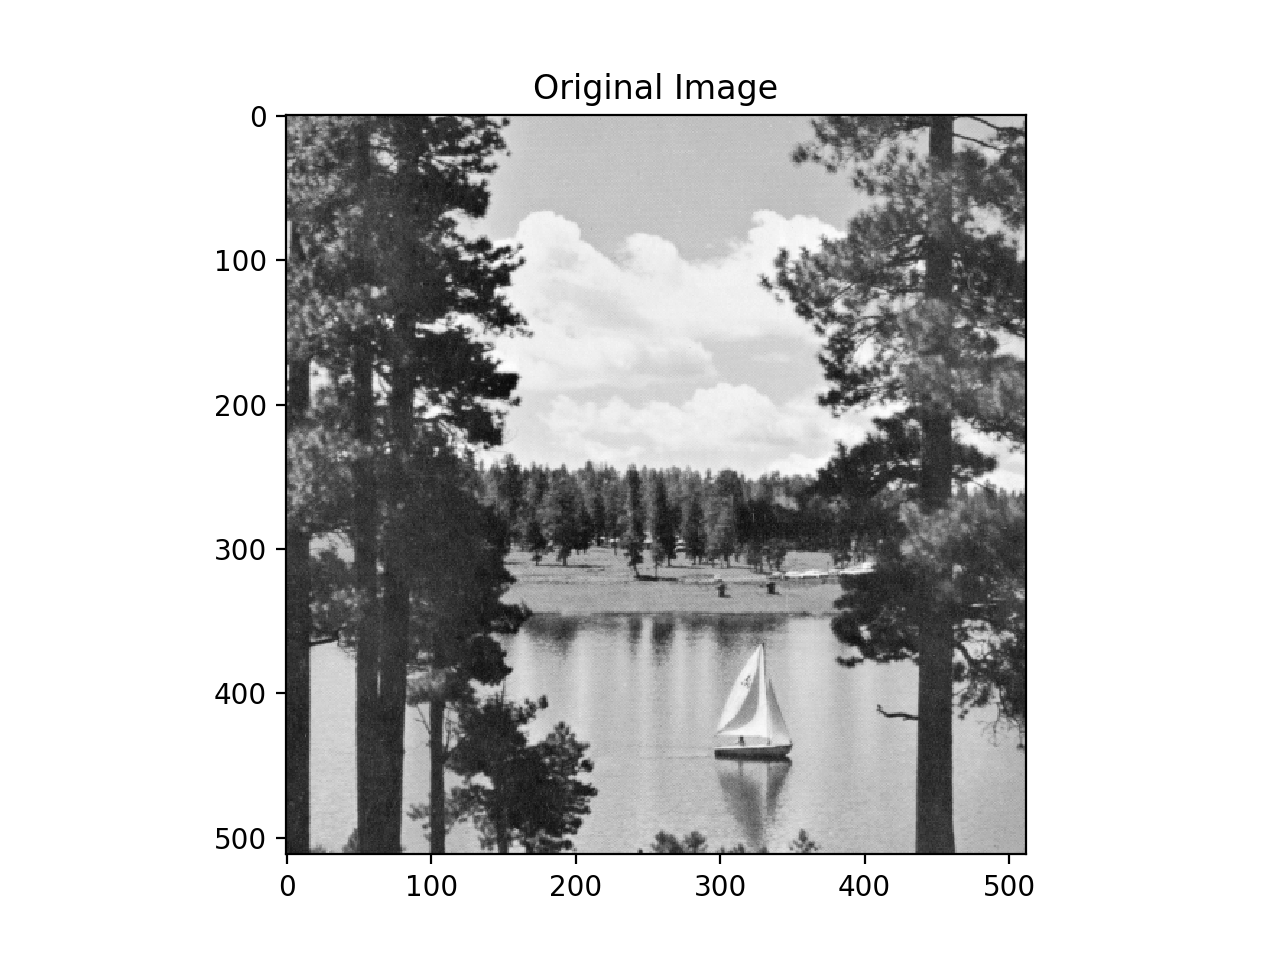

<IPython.core.display.Javascript object>


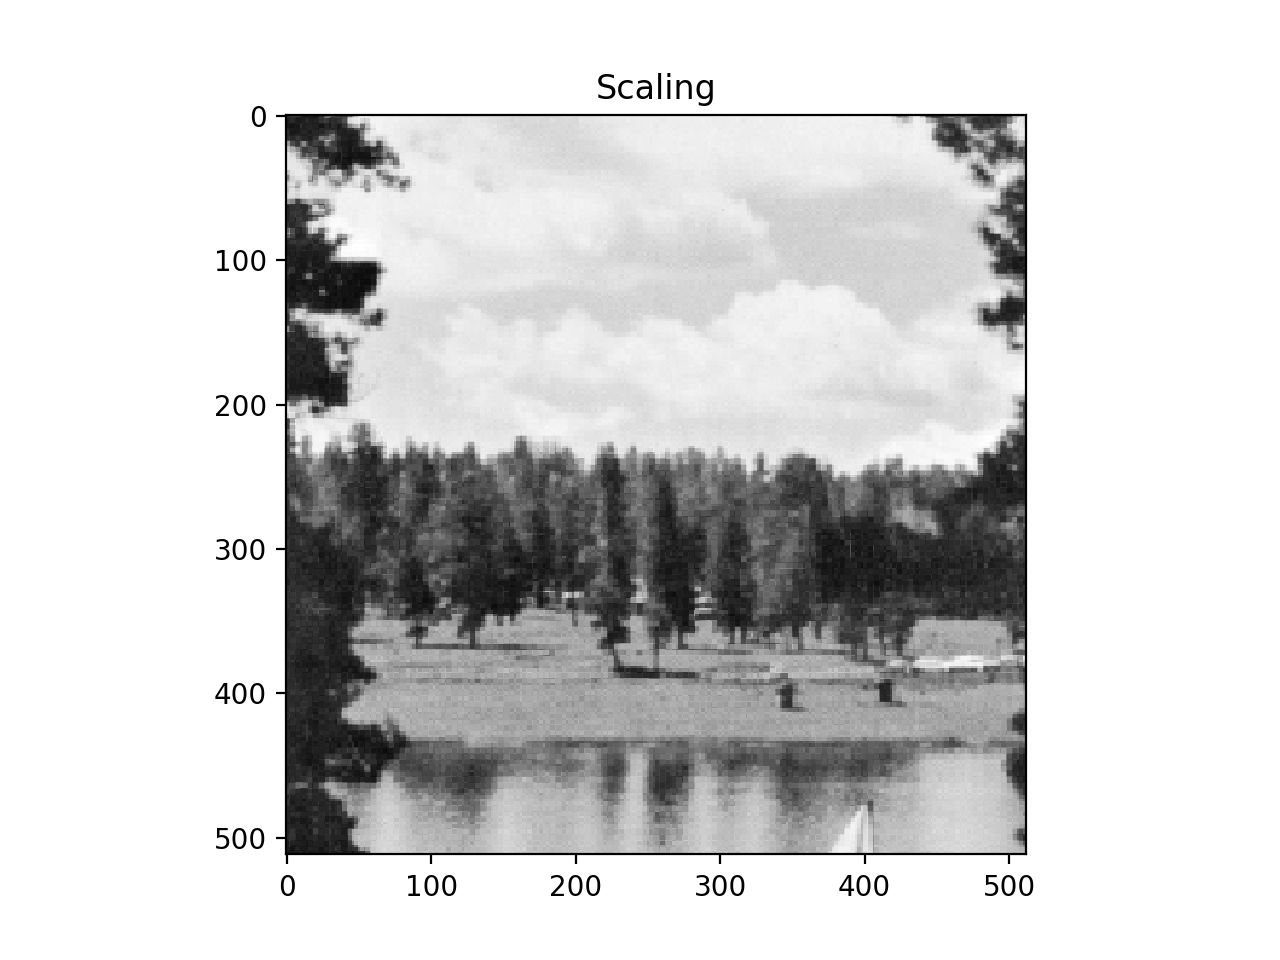

<IPython.core.display.Javascript object>


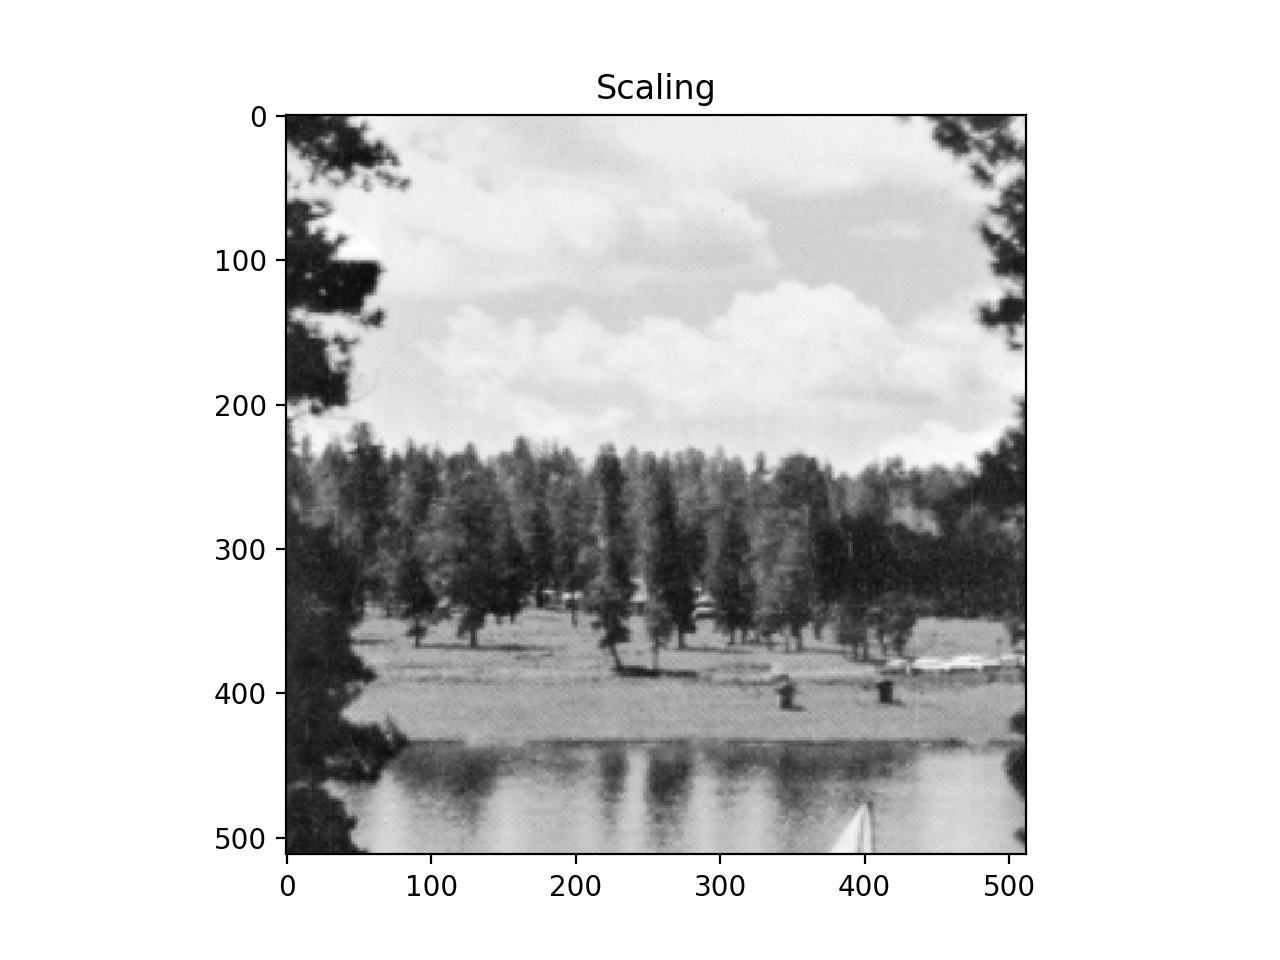

<IPython.core.display.Javascript object>


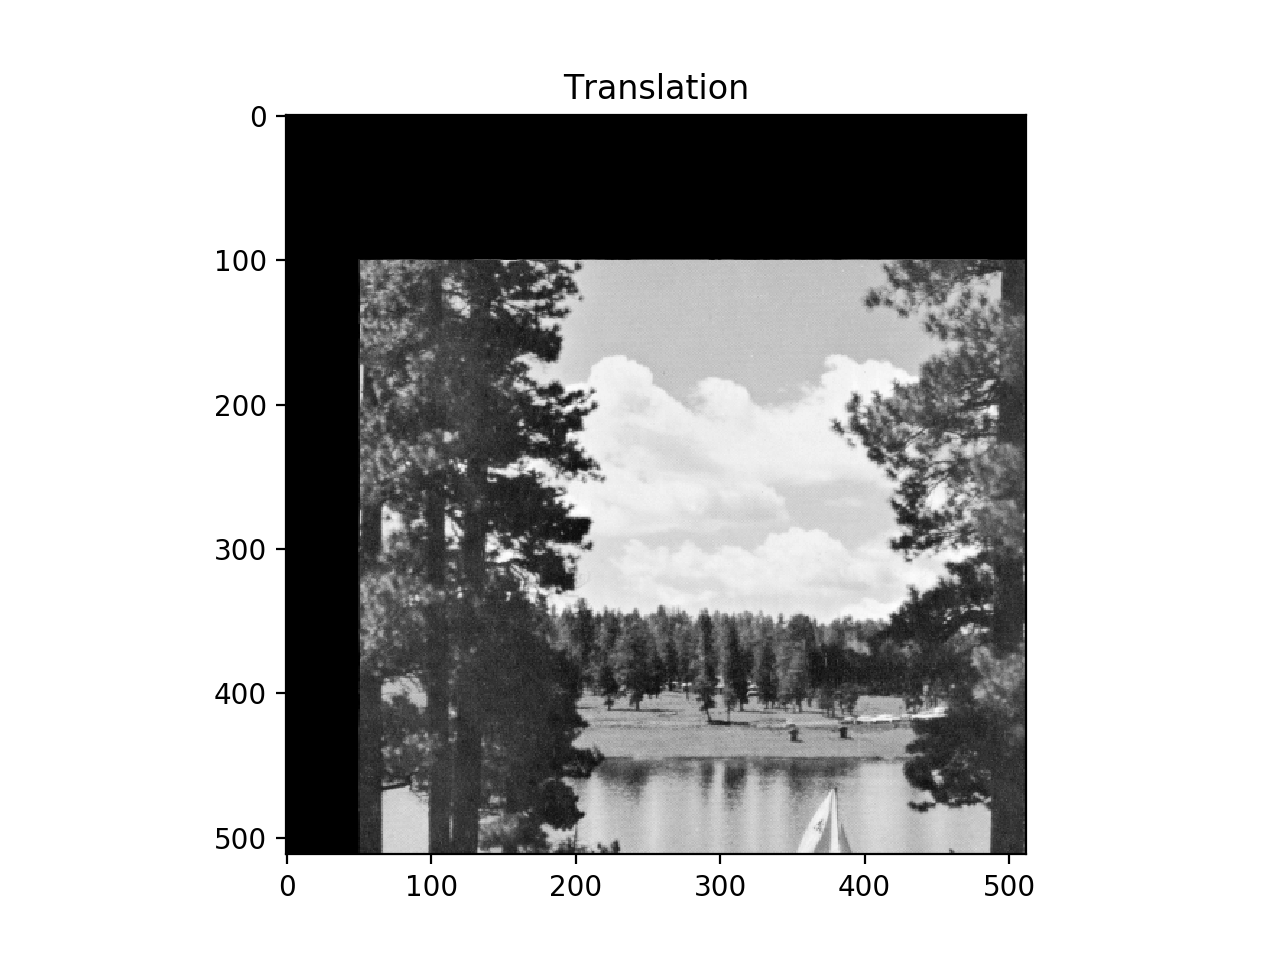

<IPython.core.display.Javascript object>


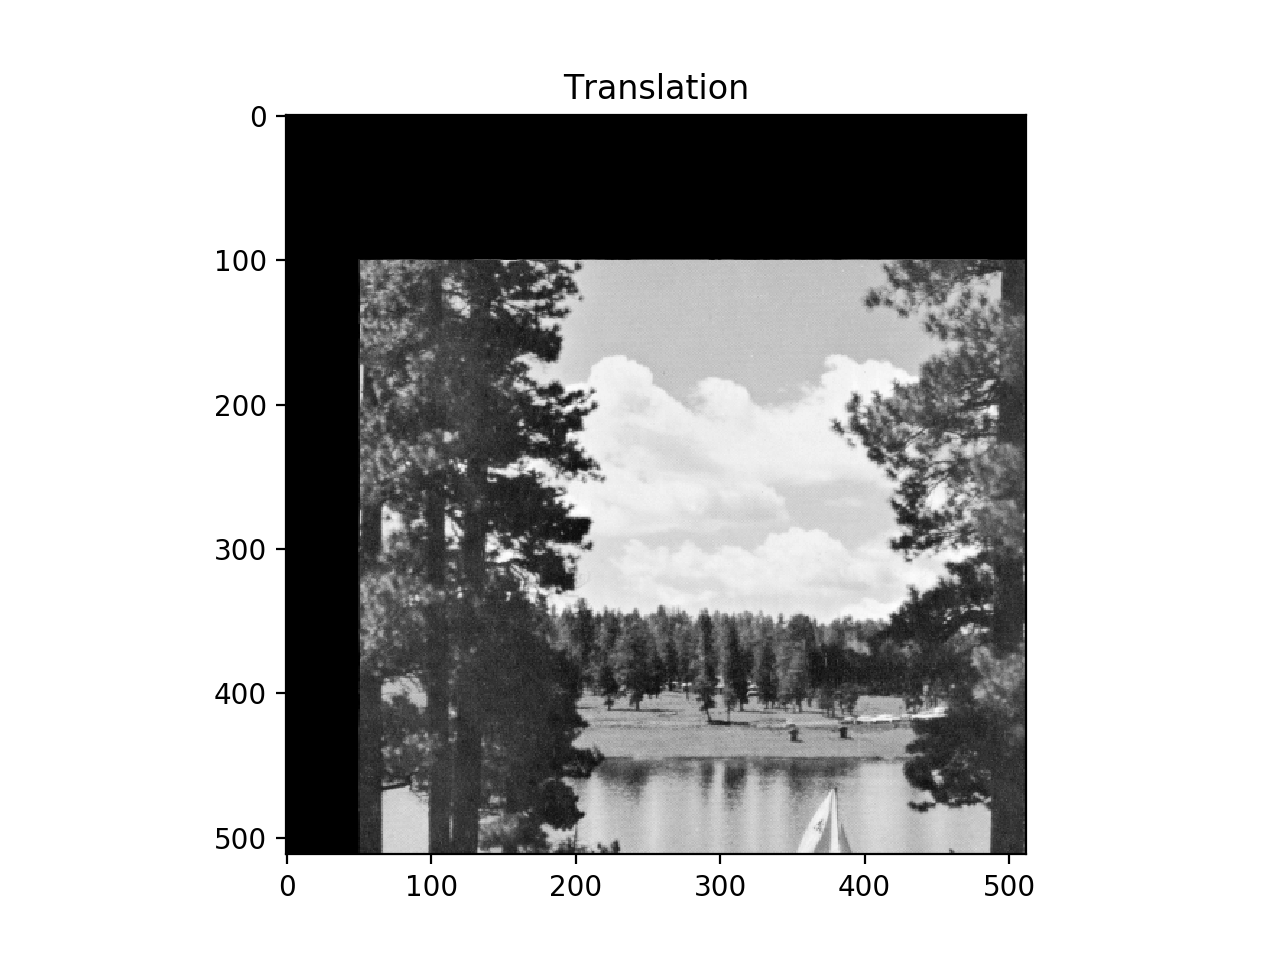

<IPython.core.display.Javascript object>


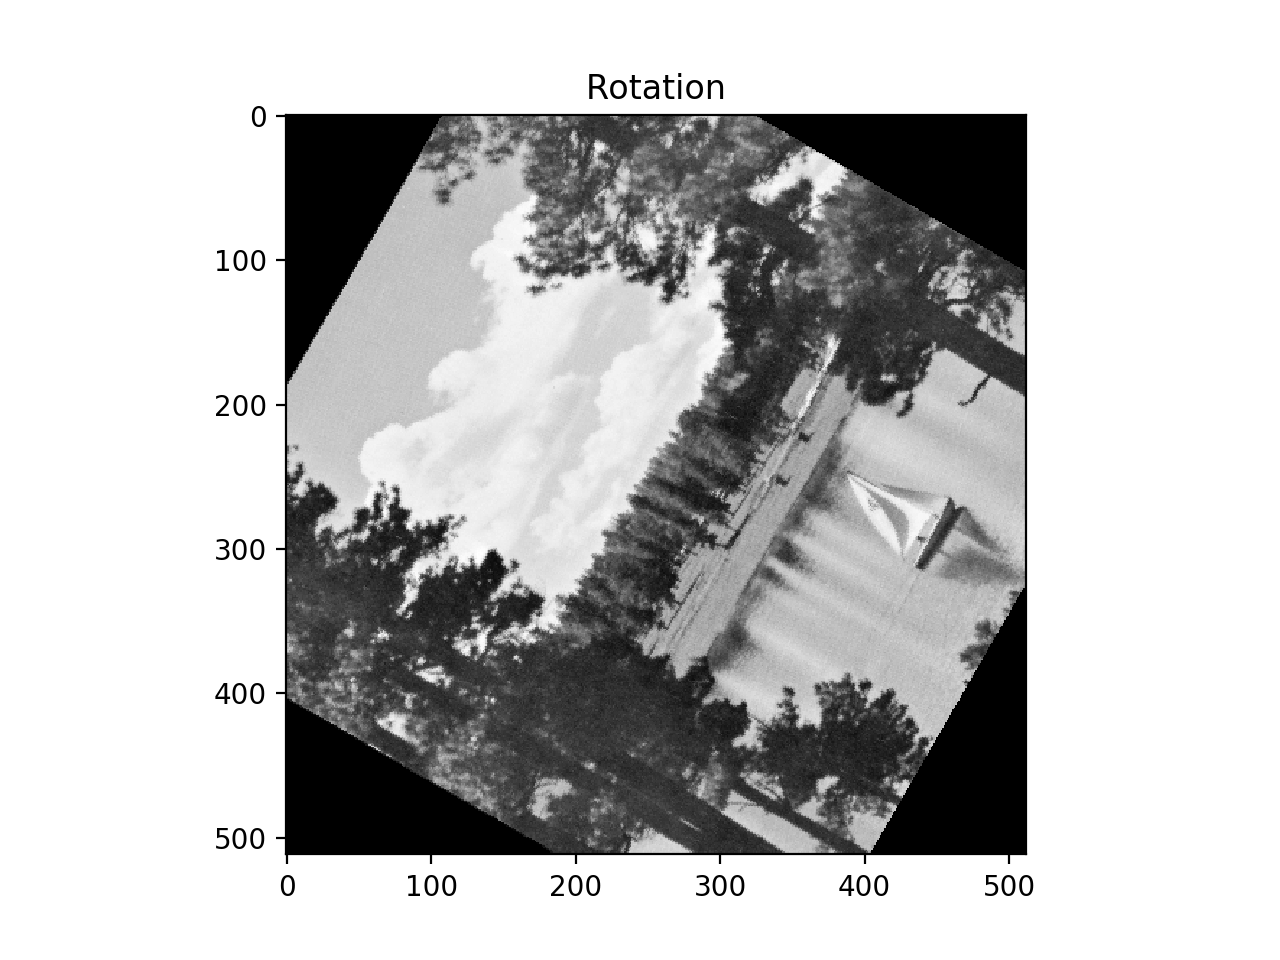

<IPython.core.display.Javascript object>


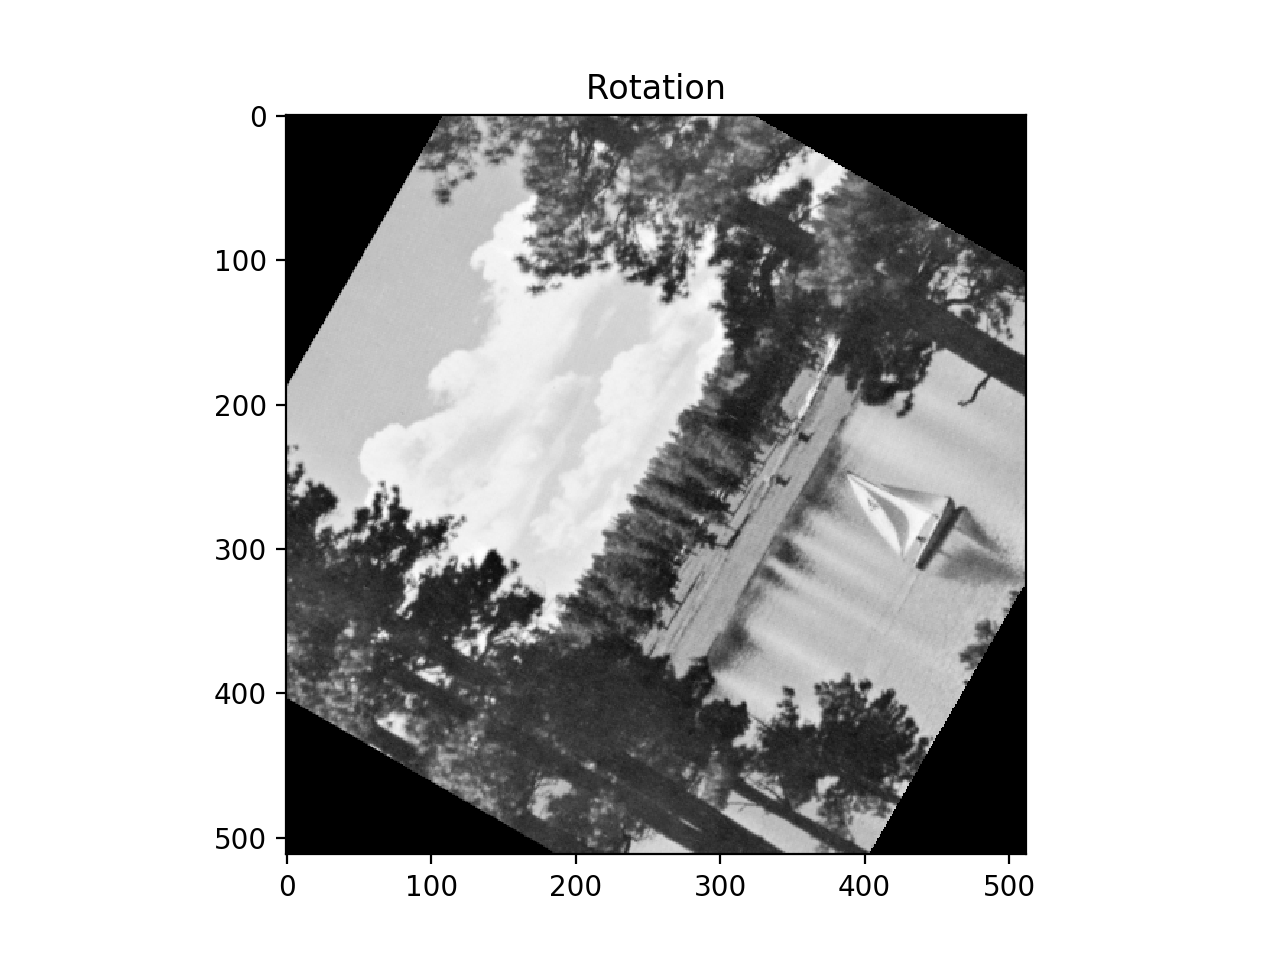

(512, 512) (512, 512)


<IPython.core.display.Javascript object>


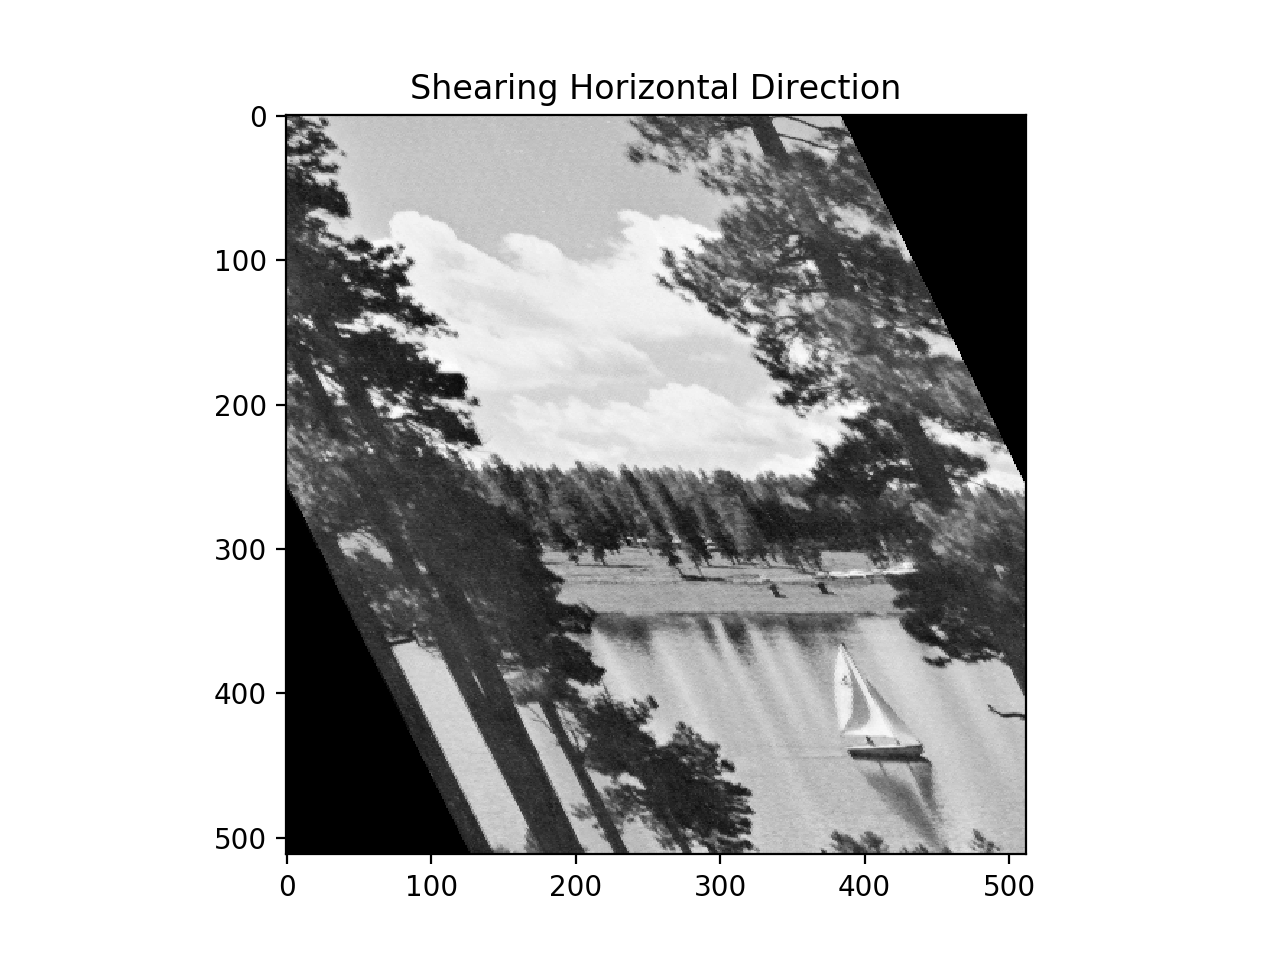

(512, 512) (512, 512)


<IPython.core.display.Javascript object>


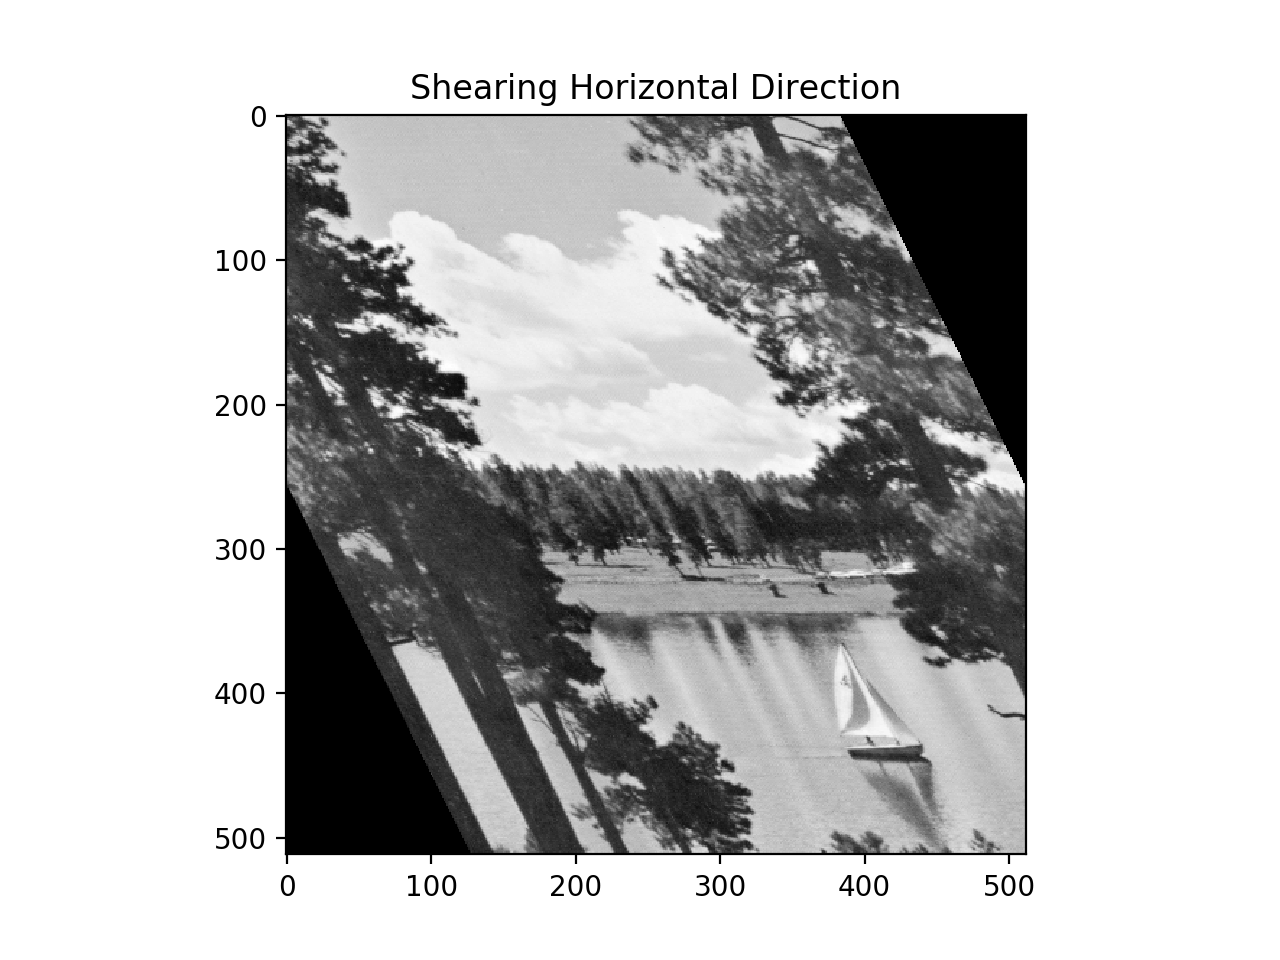

(512, 512) (512, 512)


<IPython.core.display.Javascript object>


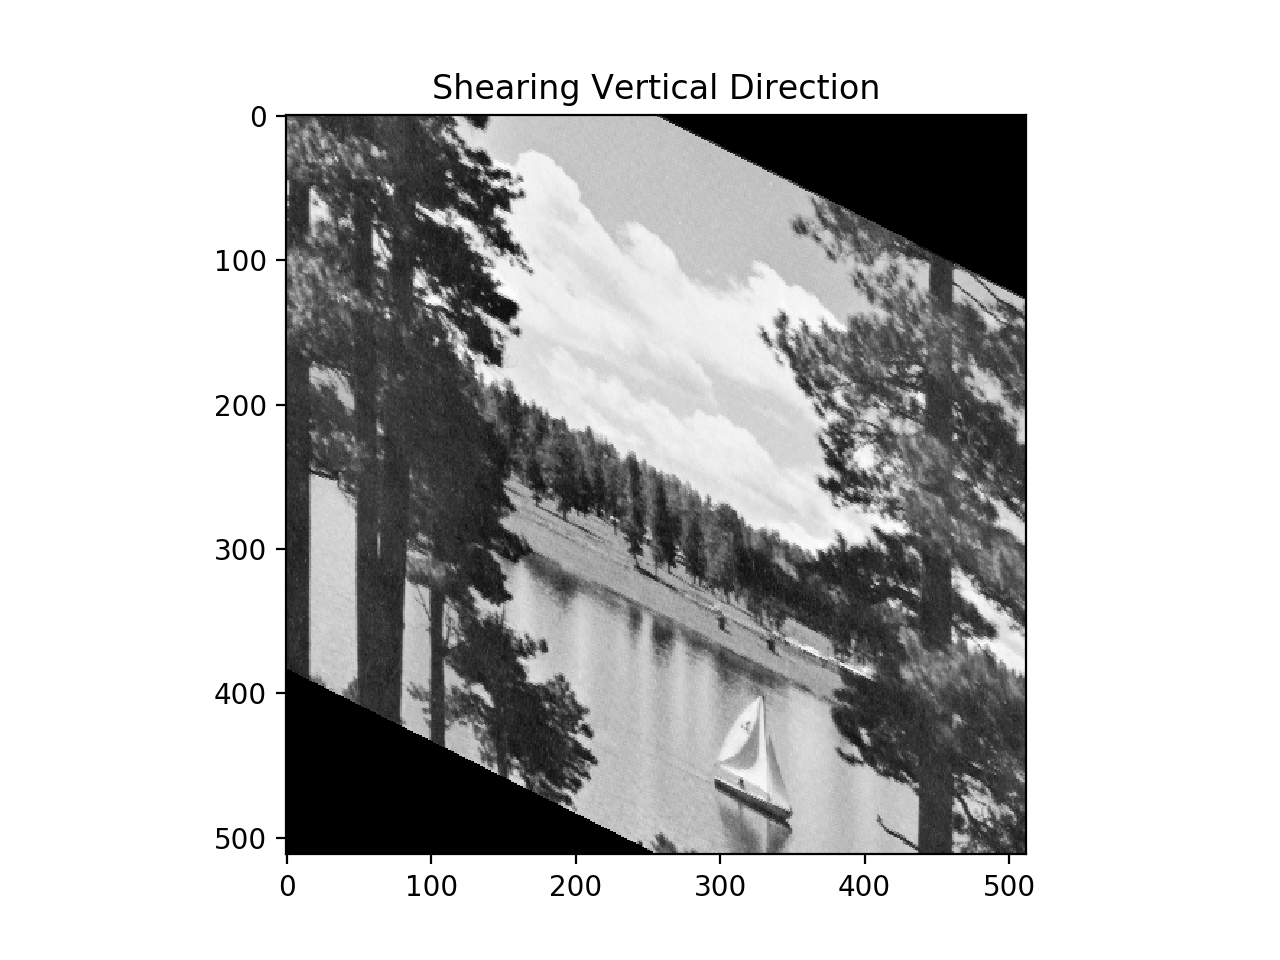

(512, 512) (512, 512)


<IPython.core.display.Javascript object>


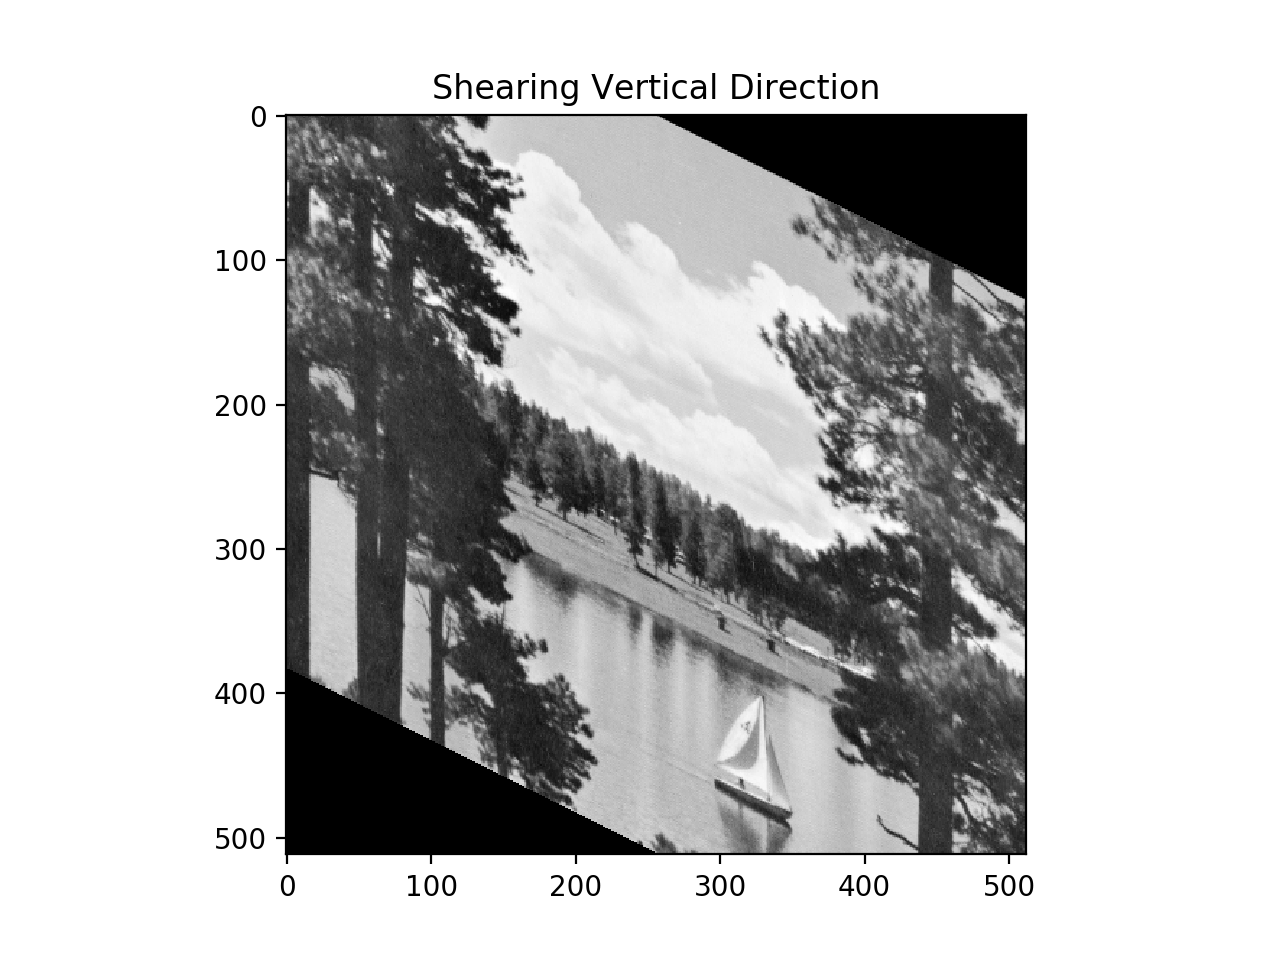

<IPython.core.display.Javascript object>


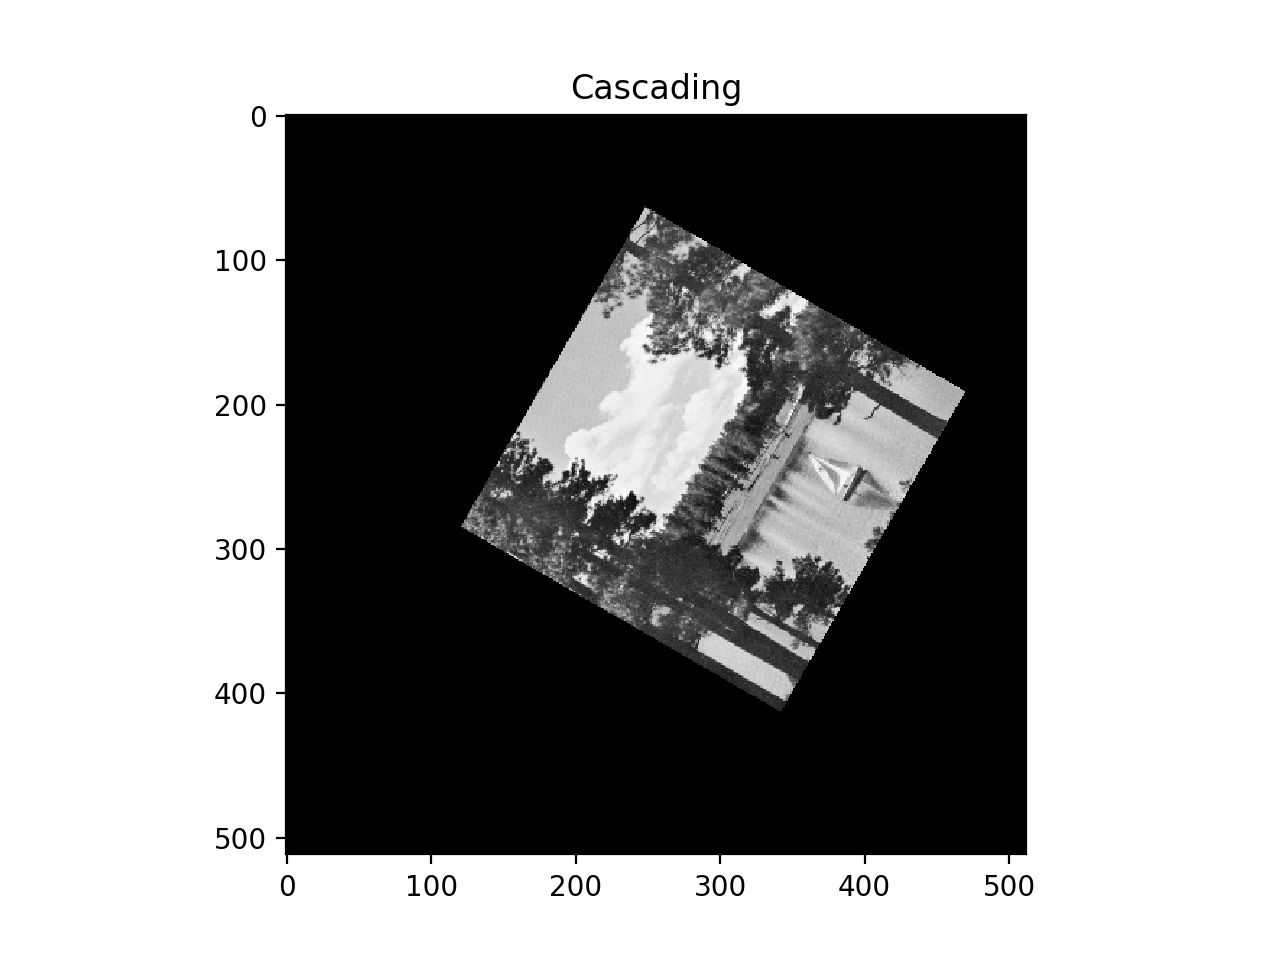

<IPython.core.display.Javascript object>


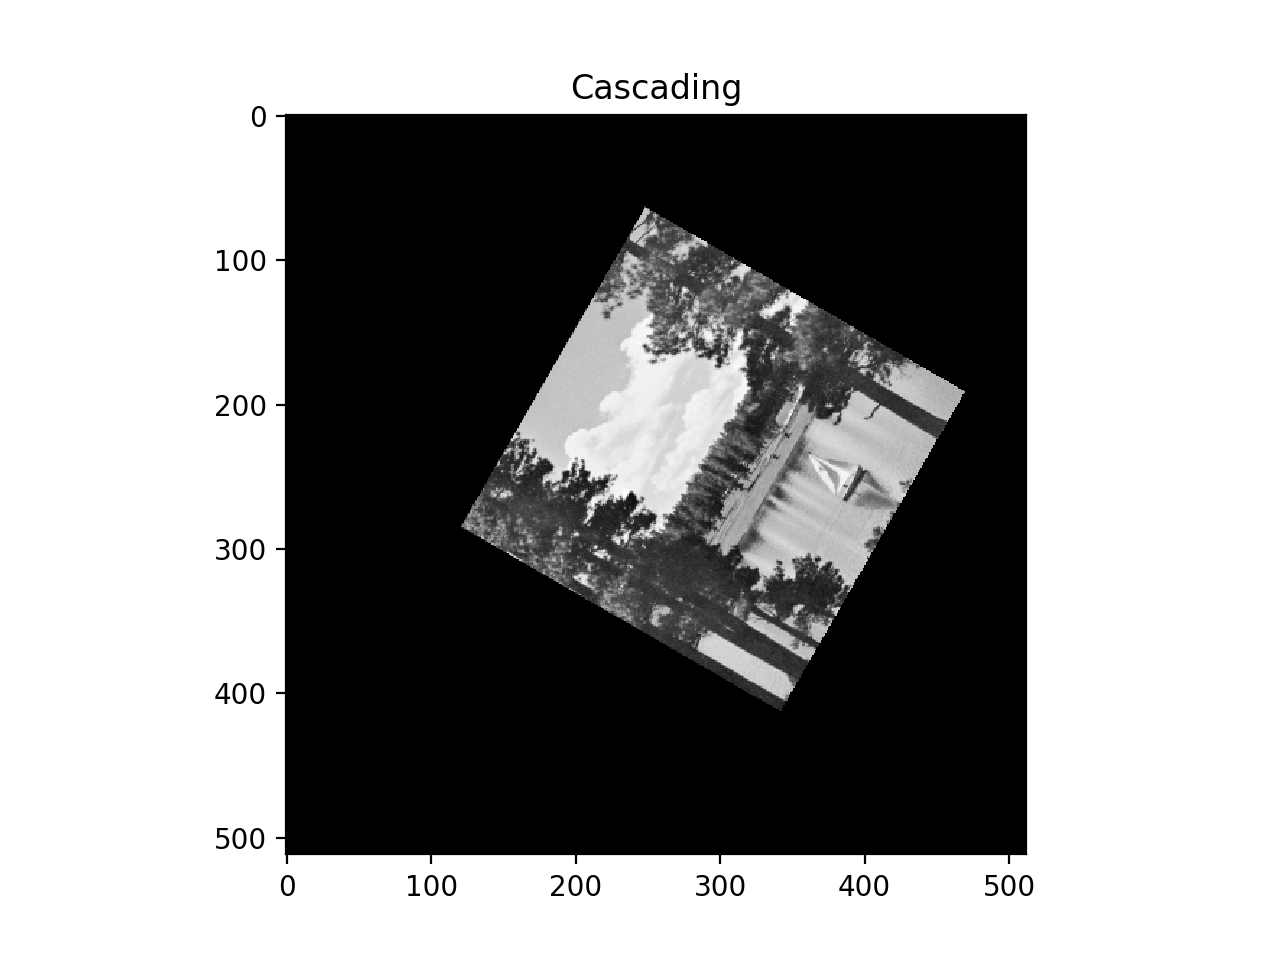

In [36]:
if __name__ == "__main__":
    """
    Driver: main function
    
    """
    # read an image in grayscale
    img = cv2.imread('test.jpg',0)
    figure()
    plt.title("Original Image")  
    #plot the original image
    plt.imshow(img,  cmap='gray')
    #scale the image by NN and Bilinear interpolation
    affineTransformScaling(img, 2, 2, "NN")
    affineTransformScaling(img, 2, 2)
    #translate the image by NN and Bilinear interpolation
    affineTransformTranslation(img, 100, 50, "NN") 
    affineTransformTranslation(img, 100, 50)
    #rotate the image by NN and Bilinear interpolation
    affineTransformRotation(img, 60, "NN")
    affineTransformRotation(img, 60)
    #shear the image in horizontal direction by NN and Bilinear interpolation
    affineTransformShearingH(img, 0.5, "NN")
    affineTransformShearingH(img, 0.5)
    #shear the image in vertical direction by NN and Bilinear interpolation
    affineTransformShearingV(img, 0.5, "NN")
    affineTransformShearingV(img, 0.5)
    #cascade the transformations by NN and Bilinear interpolation
    affineTransformCascade(img, 0.5,0.5, 60, 0,0, 50, 70, "NN")
    affineTransformCascade(img, 0.5,0.5, 60, 0,0, 50, 70)